<a href="https://colab.research.google.com/github/adv555/DataScience/blob/main/Keras/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers


conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))
conv_base.trainable = False

model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5),
    metrics=["acc"]
)

58889256/58889256 [==============================] - 2s 0us/step


In [2]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [6]:
train_dir = "/content/drive/MyDrive/Data Science/DogsCatsKaggle/prepared_train_data/train"
validation_dir = "/content/drive/MyDrive/Data Science/DogsCatsKaggle/prepared_train_data/validation"
test_dir = "/content/drive/MyDrive/Data Science/DogsCatsKaggle/prepared_train_data/test"

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 800s 8s/step - loss: 0.5869 - acc: 0.6885 - val_loss: 0.4458 - val_acc: 0.8310
Epoch 2/100
100/100 [==============================] - 26s 261ms/step - loss: 0.4776 - acc: 0.7915 - val_loss: 0.3698 - val_acc: 0.8550
Epoch 3/100
100/100 [==============================] - 27s 268ms/step - loss: 0.4266 - acc: 0.8165 - val_loss: 0.3323 - val_acc: 0.8580
Epoch 4/100
100/100 [==============================] - 28s 277ms/step - loss: 0.3885 - acc: 0.8390 - val_loss: 0.3176 - val_acc: 0.8780
Epoch 5/100
100/100 [==============================] - 26s 260ms/step - loss: 0.3855 - acc: 0.8265 - val_loss: 0.2975 - val_acc: 0.8620
Epoch 6/100
100/100 [==============================] - 26s 263ms/step - loss: 0.3793 - acc: 0.8345 - val_loss: 0.2854 - val_acc: 0.8820
Epoch 7/100
100/100 [==============================] - 26s 259ms/step - loss: 0.3642 - acc: 0.8345 - val_loss: 0.2788 - val_acc: 0.8810
Epoch 8/100
100/100 [=============================

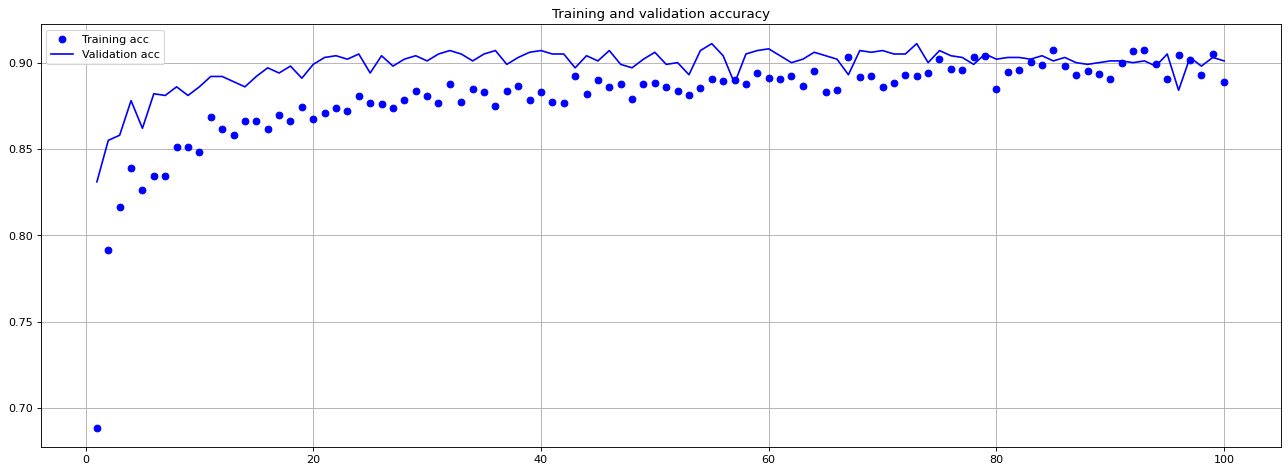

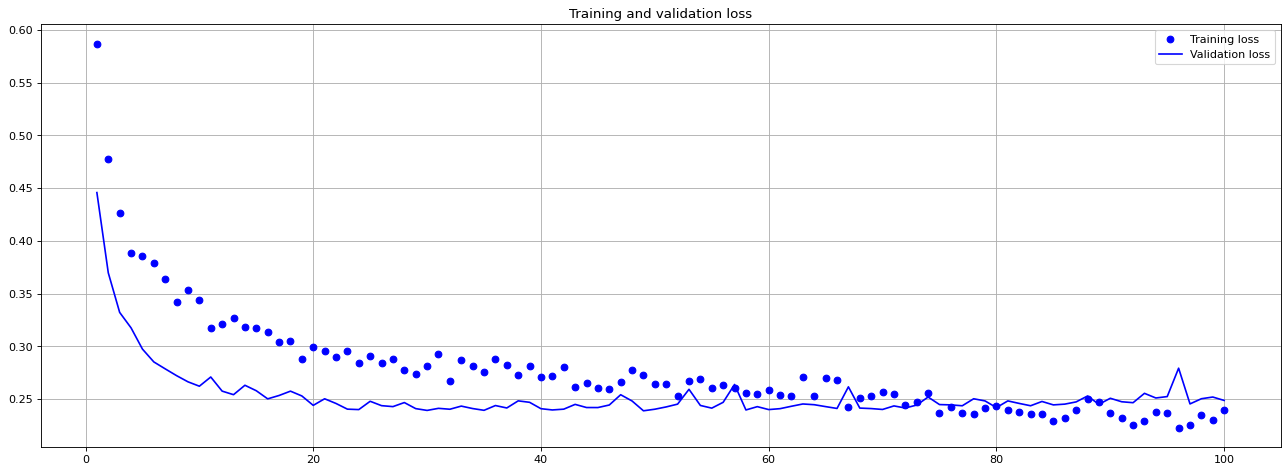

In [9]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [11]:
model.save("/content/drive/MyDrive/Data Science/DogsCatsKaggle/prepared_train_data/models/vgg16_basesd_model.hdf5")

# Дообучение

In [12]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
# conv_base.trainable = True
# set_trainable = False
# for layer in conv_base.layers:
#     if layer.name == "block5_conv1":
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

### Дообучим только несколько верхних слоев сверточной основы

In [13]:
conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

trainable_layers = [
    "block5_conv1", "block5_conv2", "block5_conv3", "block5_pool"
    ]

conv_base.trainable = True

for layer in conv_base.layers:
    if layer.name not in trainable_layers:
        set_trainable = False


modified_model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(1, activation="sigmoid"),
])

model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics=["acc"]
)


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50
)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()

### Вычислим результирующую точность сети на тестовых данных

In [ ]:
test_dir = "/content/drive/MyDrive/Data Science/DogsCatsKaggle/prepared_train_data/test"

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary"
)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print("test acc:", test_acc)

In [ ]:
model.save("/content/drive/MyDrive/Data Science/DogsCatsKaggle/prepared_train_data/models/vgg16_basesd_model2.hdf5")